### Diagnostic automatique de maladies coronaniennes


##### Etape 1 : ACP sur les données.


In [117]:
#importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder as Le
from sklearn.metrics import make_scorer, classification_report, precision_score,recall_score, f1_score, accuracy_score, confusion_matrix, balanced_accuracy_score,roc_auc_score,roc_curve 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree 
from sklearn.model_selection import GridSearchCV

In [104]:
#Importation du dataset
data = pd.read_excel("heart.xlsx",index_col=0)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
individus,,,,,,,,,,,,,,
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [106]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [107]:
#On va annoter les variables catégorielles
data["sex"] = data["sex"].astype("category")
data["cp"] = data["cp"].astype("category")
data["fbs"] = data["fbs"].astype("category")
data["restecg"] = data["restecg"].astype("category")
data["exang"] = data["exang"].astype("category")
data["slope"] = data["slope"].astype("category")
data["thal"] = data["thal"].astype("category")
data["target"] = data["target"].astype("category")


In [108]:
#On divise le dataset en un ensemble d'entrainement et un ensemble de test
data_train, data_test = train_test_split(data, test_size=0.25, random_state=None)


In [109]:
#On divise la base d'apprentissage et de test en features et target
features_train = data_train.iloc[:,:-1]
target_train = data_train.iloc[:,-1]

features_test = data_test.iloc[:,:-1]
target_test = data_test.iloc[:,-1]


In [110]:
#On va maintenant faire l'ACP sur les variables quantitatives uniquement 

#On sépare les données quantitatives
numeric_features = features_train.select_dtypes(exclude="category")

#On fait l'ACP
#On centre et reduit les données
sc = SC()
numeric_features_scaled = sc.fit_transform(numeric_features)

acp = PCA()
acp_result = acp.fit_transform(numeric_features_scaled)

le = Le()


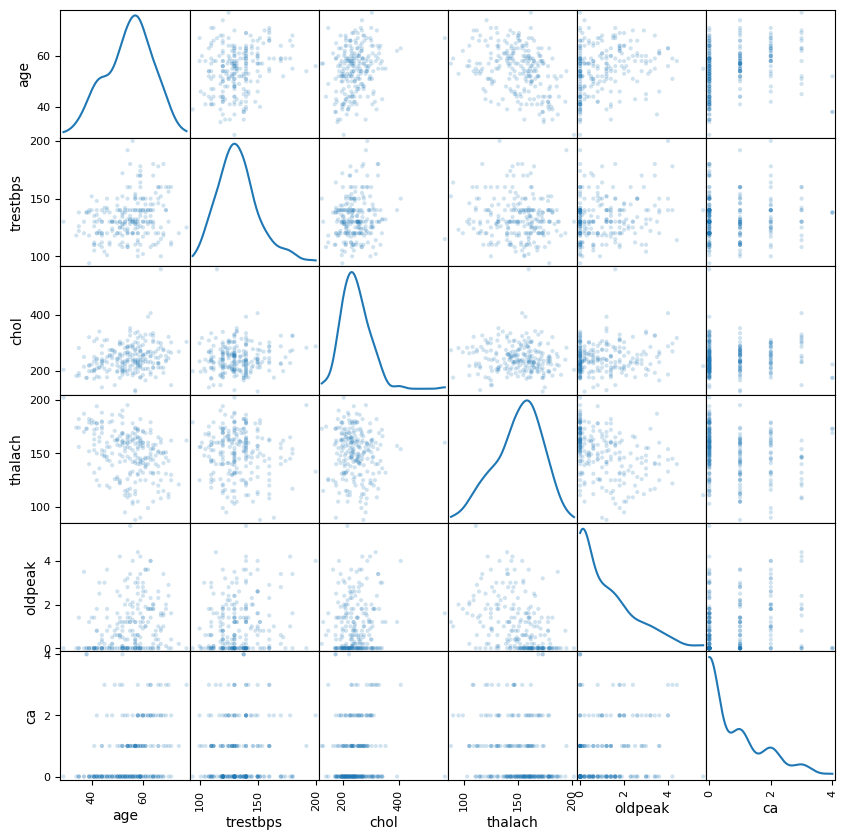

In [111]:
#On va afficher une synthèse de l'analyse bivariée (scatter matrix)
pd.plotting.scatter_matrix(features_train, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

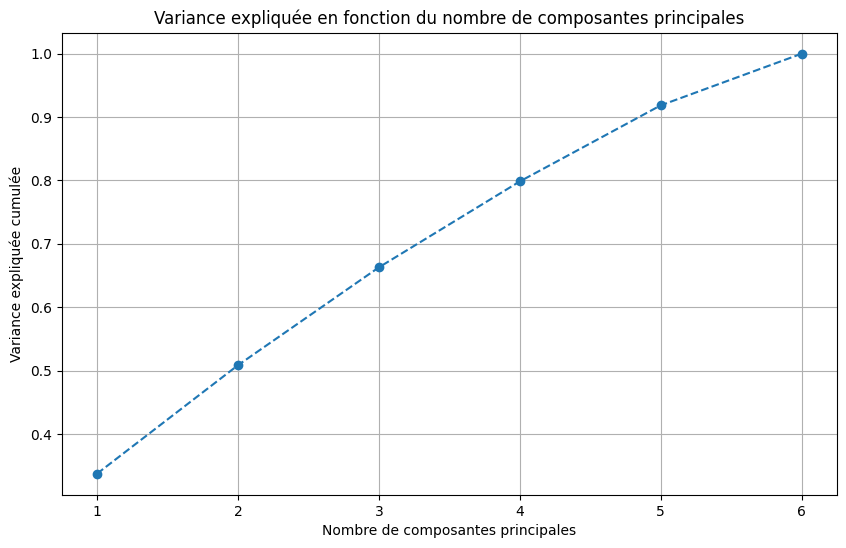

In [112]:
#On va tracer la variance expliquée en fonction du nombre de composantes principales
explained_variance = acp.explained_variance_ratio_
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Variance expliquée en fonction du nombre de composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid()
plt.show()

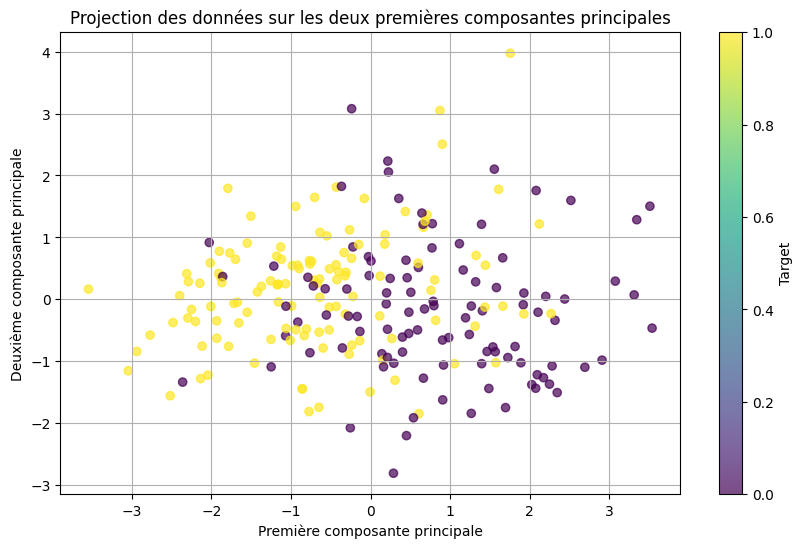

In [113]:
#On va tracer le nuage de points des deux premières composantes principales
plt.figure(figsize=(10,6))  
plt.scatter(acp_result[:,0], acp_result[:,1], c=target_train, cmap='viridis', alpha=0.7)
plt.title('Projection des données sur les deux premières composantes principales')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.colorbar(label='Target')
plt.grid()
plt.show()

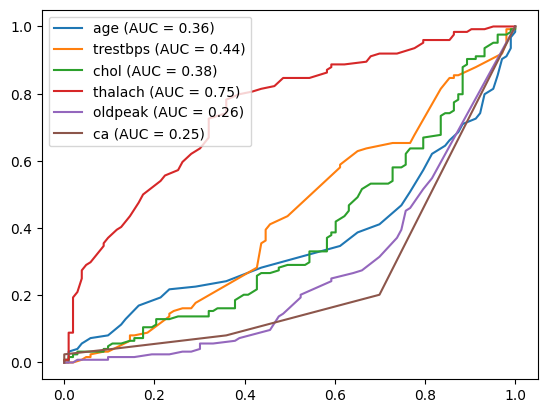

In [114]:
#On va tracer les courbes roc et calculer l'aire sous la courbe pour les différentes features

for column in features_train.columns:
    if features_train[column].dtype.name != 'category':
        fpr, tpr, _ = roc_curve(target_train, features_train[column])
        auc = roc_auc_score(target_train, features_train[column])
           
        plt.plot(fpr, tpr, label=f'{column} (AUC = {auc:.2f})')
        plt.legend(loc='upper left')


#### On va maintenant implémenter un arbre de décision


In [115]:
#On commence par séparer les données d'apprendtissage en entrainement et validation

#Données d'entrainement
X_train, X_val, y_train , y_val = train_test_split(features_train,target_train, test_size=0.25, random_state=None)


In [ ]:
#Arbre de décision
grid_params = {
  'criterion' : ["gin","entrop"],
  'cpp_alpha' : [0.0,0.01,0.1,0.5,1.0],
}

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


ValueError: Invalid parameter 'cpp_alpha' for estimator DecisionTreeClassifier(). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'].